In [8]:
import maxvol
import numpy as np

a = np.random.random((500, 500))

In [9]:
row_indices, col_indices, left, right = maxvol.pseudo_skeleton(a, 10, rtol=1.)

In [11]:
import matplotlib.pyplot as plt

l2_errors_ps, l2_errors_svd = [], []
for r in range(51, 100):
    row_indices, col_indices, left, right = maxvol.pseudo_skeleton(a, r, rtol=1.)
    l2_errors_ps.append(np.mean(np.square(left @ right - a))**.5)
    left, right = maxvol.truncated_svd(a, r)
    l2_errors_svd.append(np.mean(np.square(left @ right - a))**.5)
plt.plot(l2_errors_ps)
plt.plot(l2_errors_svd)
plt.show()

TypeError: cannot unpack non-iterable NoneType object

In [30]:
import scipy
scipy.linalg.lu(a, p_indices=True)[0]

array([48, 33, 18, 16, 34, 24,  6,  8,  2, 30, 35, 46, 23, 19,  0, 47, 22,
        1, 42, 44, 15, 20, 38, 10, 13, 32, 31, 26, 25, 41, 36, 11, 45, 21,
       27, 17,  7, 49, 40,  5, 29,  3, 14,  9, 37, 12, 43, 39, 28,  4])

In [28]:
upper_rows = maxvol.maxvol(a)

ValueError: attempt to get argmax of an empty sequence

In [18]:
np.max(np.abs(np.linalg.solve(a[upper_rows].T, a.T).T))

1.0059273068234056

In [13]:
abs(np.linalg.det(a[upper_rows]))

7.188764896473395e+33

In [6]:
import itertools

vols = np.stack([abs(np.linalg.det(a[list(rows)])) for rows in itertools.combinations(range(35), 5)])

In [7]:
vols.max()

0.9803475623499796

(array([2.46123e+05, 5.40690e+04, 1.61520e+04, 5.43000e+03, 1.91100e+03,
        6.58000e+02, 2.06000e+02, 6.30000e+01, 1.70000e+01, 3.00000e+00]),
 array([5.62548943e-08, 9.80348069e-02, 1.96069557e-01, 2.94104308e-01,
        3.92139059e-01, 4.90173809e-01, 5.88208560e-01, 6.86243311e-01,
        7.84278061e-01, 8.82312812e-01, 9.80347562e-01]),
 <BarContainer object of 10 artists>)

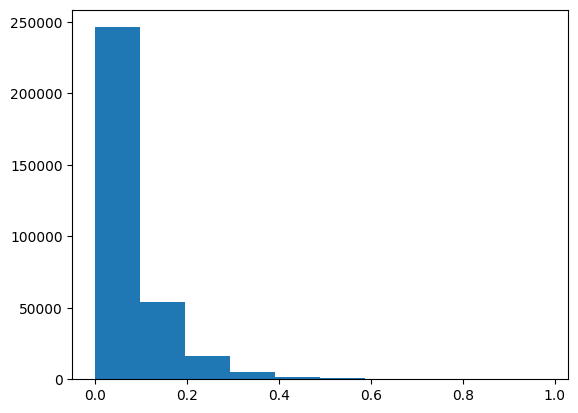

In [8]:
import matplotlib.pyplot as plt

plt.hist(vols)

In [21]:
a = np.random.random((100, 10))
q, t = np.linalg.qr(a)

(100, 10)

In [12]:
a = np.random.random((4,6))

In [13]:
a

array([[0.26361287, 0.49643169, 0.4821415 , 0.86379335, 0.55075258,
        0.5431032 ],
       [0.44984674, 0.70308365, 0.23158761, 0.77748455, 0.18774105,
        0.31674204],
       [0.29576159, 0.80029583, 0.74097408, 0.55774633, 0.44813672,
        0.22080711],
       [0.97130625, 0.9832359 , 0.97892594, 0.42591416, 0.99871325,
        0.16345896]])

In [15]:
u, d, vt = np.linalg.svd(a)

In [16]:
rows = [1, 3]
cols = [2, 4]

In [18]:
a[rows][:, cols]

array([[0.23158761, 0.18774105],
       [0.97892594, 0.99871325]])

In [19]:
u.shape

(4, 4)

In [20]:
vt.shape

(6, 6)

In [22]:
d = np.diag(d)

In [28]:
u[rows] @ d @ vt[:4, cols]

array([[0.23158761, 0.18774105],
       [0.97892594, 0.99871325]])

In [29]:
a[:,cols] @ np.linalg.inv(a[rows][:, cols]) @ a[rows]

array([[ 0.21144783, -0.08643629,  0.4821415 , -0.61111361,  0.55075258,
        -0.2568019 ],
       [ 0.44984674,  0.70308365,  0.23158761,  0.77748455,  0.18774105,
         0.31674204],
       [ 2.13107476,  3.72850375,  0.74097408,  4.61490099,  0.44813672,
         1.88755814],
       [ 0.97130625,  0.9832359 ,  0.97892594,  0.42591416,  0.99871325,
         0.16345896]])

In [37]:
np.linalg.inv(a[rows][:, cols])

array([[ 21.02331673,  -3.9520249 ],
       [-20.60678599,   4.87501264]])

In [45]:
u[rows] @ np.linalg.inv(d) @ vt[:4, cols]

array([[-1.09174657, -0.98816366],
       [-0.18488576,  0.65725037]])

In [43]:
u[rows] @ u[rows].T

array([[1.00000000e+00, 1.27786351e-16],
       [1.27786351e-16, 1.00000000e+00]])

In [44]:
u[rows] @ d**2 @ u[rows].T

array([[1.49037598, 1.92535864],
       [1.92535864, 4.07403451]])

In [53]:
maxvol.maxvol(np.random.random((100000, 500)))

array([45025, 56837, 99546, 45605, 25564, 95755, 26690, 95111, 79234,
       39955, 29416, 94843, 32962, 86414, 27100, 52112, 94292, 86138,
       15439, 72007, 64051, 59340, 30025, 40092, 65793, 93350, 55046,
       22095, 35296, 68484, 34871, 63332, 53487, 51820, 46364, 35396,
       10570, 58668, 59684, 84256, 97322, 91044, 99058, 20018, 39449,
        2021, 15333, 47923,  7405, 78532, 22457, 44226, 53536, 16340,
       93045, 93336, 64612, 40324, 51652, 85167, 47118, 65775,  8686,
       96742, 94097, 12149, 81943, 94739, 39812, 20574, 94997, 65594,
       13736, 93532, 95477, 83242, 54167, 23926,  4677, 18807, 28651,
       88306, 93102, 58152, 59006, 66350, 86516, 46860, 78241, 53953,
       11429,  2196, 57100, 29841, 58984, 84049,  1117, 79198, 91136,
       41747, 86221, 17007, 92514, 21335,  8261, 87327,  4289, 77707,
       97711, 85672, 52047, 87445, 33797, 90155, 32607, 33997, 31532,
       86557, 82947, 69462, 29186, 55182, 52835, 23898, 27647, 84595,
       97343, 17673,

In [55]:
x = np.load('x.npy')

In [56]:
_, d, _ = np.linalg.svd(x)

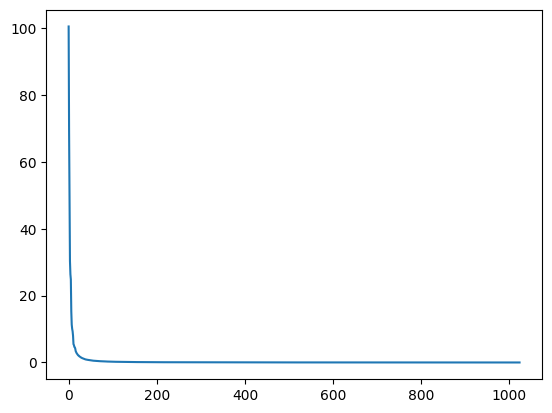

In [57]:
import matplotlib.pyplot as plt
plt.plot(d)
plt.show()

In [85]:
rows, cols, left, right = maxvol.pseudo_skeleton(x, 50, rtol=.5)

8.911514
3.2581356


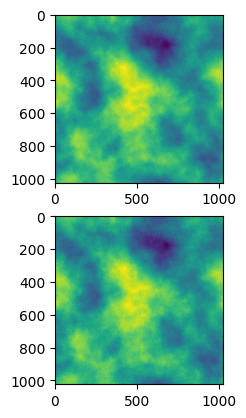

In [87]:
print(np.linalg.norm(x - left @ right))
bleft, bright = maxvol.truncated_svd(x, 50)
print(np.linalg.norm(x - bleft @ bright))
_, (ax1, ax2) = plt.subplots(2)
ax1.imshow(x)
ax2.imshow(left @ right)